In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

virus = pd.read_excel('C:/Users/lldiazr/Documents/EJERCICIO/COVID_BOGOTA.xlsx', index_col=None)
virus.head()

,ID,Fecha de Inicio de Síntomas,Fecha de diagnóstico,Ciudad de residencia,Localidad de residencia,Edad,Unidad de medida de la edad,Sexo,Tipo de caso,Ubicación,Estado
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Usaquén,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado


In [2]:
virus.describe()

,ID,Edad,Unidad de medida de la edad
count,227979.000000,227979.000000,227979.000000
mean,113990.000000,39.152382,1.005321
std,65812.012847,18.136015,0.079325
min,1.000000,1.000000,1.000000
25%,56995.500000,26.000000,1.000000
50%,113990.000000,37.000000,1.000000
75%,170984.500000,51.000000,1.000000
max,227979.000000,104.000000,3.000000


In [3]:
x=virus.iloc[:, 6:8]
# Datos agrupados por sexo
By_Sexo = x.groupby('Sexo')
# Regresa la media de cada columna numérica por sexo
By_Sexo.mean()

,Unidad de medida de la edad
Sexo,
F,1.004750
M,1.005909


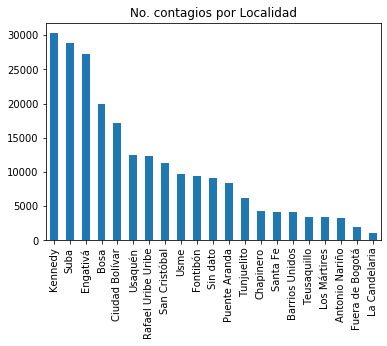

In [4]:
# Gráfico de barras de Localidades
plot = virus['Localidad de residencia'].value_counts().plot(kind='bar',
                                            title='No. contagios por Localidad')

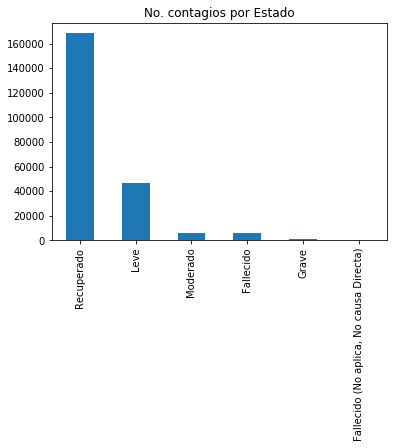

In [5]:
# Gráfico de barras de Localidades
plot = virus['Estado'].value_counts().plot(kind='bar',
                                            title='No. contagios por Estado')

In [6]:
virus = virus[virus.Estado != 'Leve']
virus = virus[virus.Estado != 'Fallecido (No aplica, No causa Directa)']

In [7]:
virus['Estado2'] = virus['Estado'].replace('Recuperado',0).replace(['Fallecido','Grave','Moderado'],1)

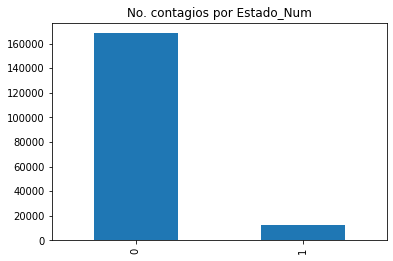

In [8]:
# Gráfico de barras de Localidades
plot = virus['Estado2'].value_counts().plot(kind='bar',
                                            title='No. contagios por Estado_Num')

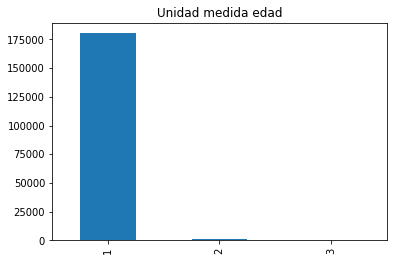

In [9]:
# Gráfico de barras de Localidades
plot = virus['Unidad de medida de la edad'].value_counts().plot(kind='bar',
                                            title='Unidad medida edad')

In [10]:
#Existen individuos con edades registradas en 2 (meses) y otros en 3 (días), estos se eliminan 
virus = virus.drop(virus[virus['Unidad de medida de la edad']>1].index)   

In [11]:
virus.head()

,ID,Fecha de Inicio de Síntomas,Fecha de diagnóstico,Ciudad de residencia,Localidad de residencia,Edad,Unidad de medida de la edad,Sexo,Tipo de caso,Ubicación,Estado,Estado2
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado,0
1,2,2020-03-04,2020-03-10,Bogotá,Usaquén,22,1,F,Importado,Casa,Recuperado,0
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado,0
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado,0
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado,0


In [12]:
recupera =  virus[virus.Estado2 != 1]
norecupera =  virus[virus.Estado2 != 0]

norecupera.head()

,ID,Fecha de Inicio de Síntomas,Fecha de diagnóstico,Ciudad de residencia,Localidad de residencia,Edad,Unidad de medida de la edad,Sexo,Tipo de caso,Ubicación,Estado,Estado2
62,63,2020-03-10,2020-03-20,Bogotá,Usaquén,64,1,M,Importado,Fallecido,Fallecido,1
63,64,2020-03-18,2020-03-20,Bogotá,Puente Aranda,53,1,F,Desconocido,Fallecido,Fallecido,1
88,89,2020-03-11,2020-03-21,Bogotá,Suba,59,1,F,Importado,Fallecido,Fallecido,1
100,101,2020-03-10,2020-03-22,Bogotá,Kennedy,76,1,M,Desconocido,Fallecido,Fallecido,1
111,112,2020-03-10,2020-03-22,Bogotá,Usaquén,63,1,M,Relacionado,Fallecido,Fallecido,1


In [13]:
muestra = recupera.sample(n=40000)

In [14]:
df = pd.concat([norecupera,muestra])
df.count()

ID                             52662
Fecha de Inicio de Síntomas    42658
Fecha de diagnóstico           52662
Ciudad de residencia           52662
Localidad de residencia        52662
Edad                           52662
Unidad de medida de la edad    52662
Sexo                           52662
Tipo de caso                   52662
Ubicación                      52662
Estado                         52662
Estado2                        52662
dtype: int64

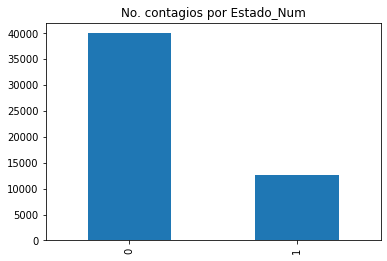

In [15]:
# Gráfico de barras de Localidades
plot = df['Estado2'].value_counts().plot(kind='bar',
                                            title='No. contagios por Estado_Num')

In [16]:
df.drop(['Fecha de Inicio de Síntomas', 'Fecha de diagnóstico','Ciudad de residencia','Unidad de medida de la edad','Estado'],axis = 'columns', inplace=True)

In [17]:
cols_categoricas = ['Sexo','Tipo de caso','Ubicación','Localidad de residencia']

In [18]:
cat_df = df.select_dtypes(include=['object'])
cols_categoricas_lst = cat_df.columns

In [19]:
one_hot = pd.get_dummies(data=df, columns=cols_categoricas_lst, prefix = cols_categoricas, prefix_sep = '_' )

In [20]:
df_num = df.drop(cols_categoricas, axis=1)
df_new = pd.concat([df_num, one_hot], axis = 1)

In [21]:
df_new = df_new.loc[:,~df_new.columns.duplicated()]
df_new

,ID,Edad,Estado2,Sexo_Antonio Nariño,Sexo_Barrios Unidos,Sexo_Bosa,Sexo_Chapinero,Sexo_Ciudad Bolívar,Sexo_Engativá,Sexo_Fontibón,...,Tipo de caso_F,Tipo de caso_M,Ubicación_Desconocido,Ubicación_En estudio,Ubicación_Importado,Ubicación_Relacionado,Localidad de residencia_Casa,Localidad de residencia_Fallecido,Localidad de residencia_Hospital,Localidad de residencia_Hospital UCI
62,63,64,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
63,64,53,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
88,89,59,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
100,101,76,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
111,112,63,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151771,151772,20,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
127836,127837,39,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
62890,62891,3,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
134108,134109,6,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [22]:
X = np.array(df_new.drop(['Estado2'],1))
y = np.array(df_new['Estado2'])
X.shape

(52662, 33)

In [23]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
  
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predictions = model.predict(X)
print(predictions)

[0 0 0 ... 0 0 0]


In [25]:
model.score(X,y)

0.7595609737571684

In [26]:
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation=model_selection.train_test_split(X,y, test_size=validation_size,random_state=seed)

In [27]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
accuracy = model_selection.cross_val_score(model, X_train, Y_train, cv=10)

In [28]:
accuracy.mean()

0.7476329519873098

In [29]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.765111715931388


In [30]:
print(classification_report(Y_validation,predictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     12088
           1       0.00      0.00      0.00      3711

    accuracy                           0.77     15799
   macro avg       0.38      0.50      0.43     15799
weighted avg       0.59      0.77      0.66     15799



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
